In [240]:
import numpy as np
import enum
import cv2
from ipywidgets import interact, fixed, IntRangeSlider, Layout

import matplotlib.pyplot as plt

from skimage.morphology import remove_small_objects, remove_small_holes

In [241]:
class ColorScheme(enum.Enum):
    BGR = 1


class ProbioDetector:
    @staticmethod
    def detect(img: np.ndarray, img_color_scheme: ColorScheme):
        pass

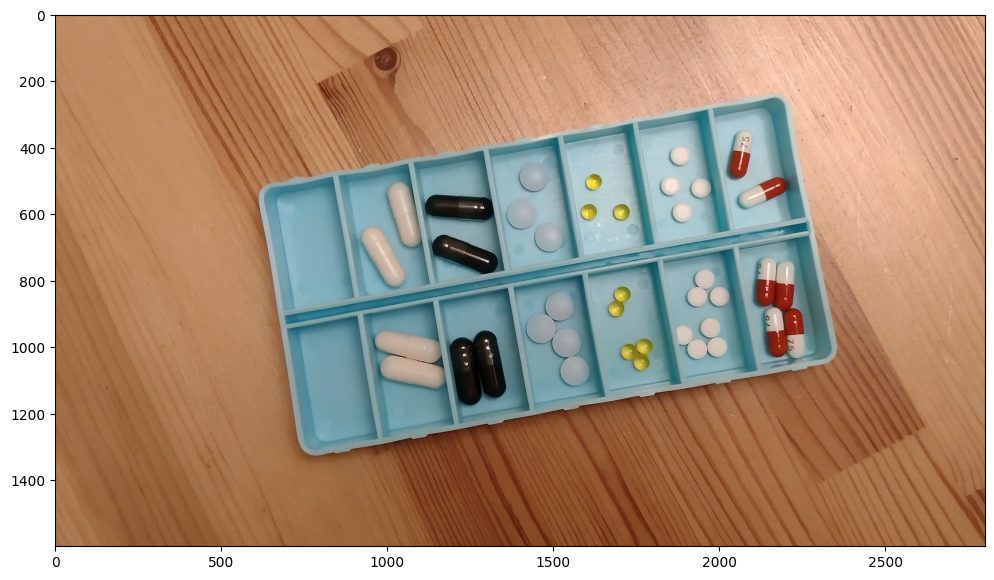

In [242]:
calib = cv2.imread("calib.png")
calib_color_scheme = ColorScheme.BGR
plt.subplots(1, 1, figsize=(12, 8))[1].imshow(cv2.cvtColor(calib, cv2.COLOR_BGR2RGB))

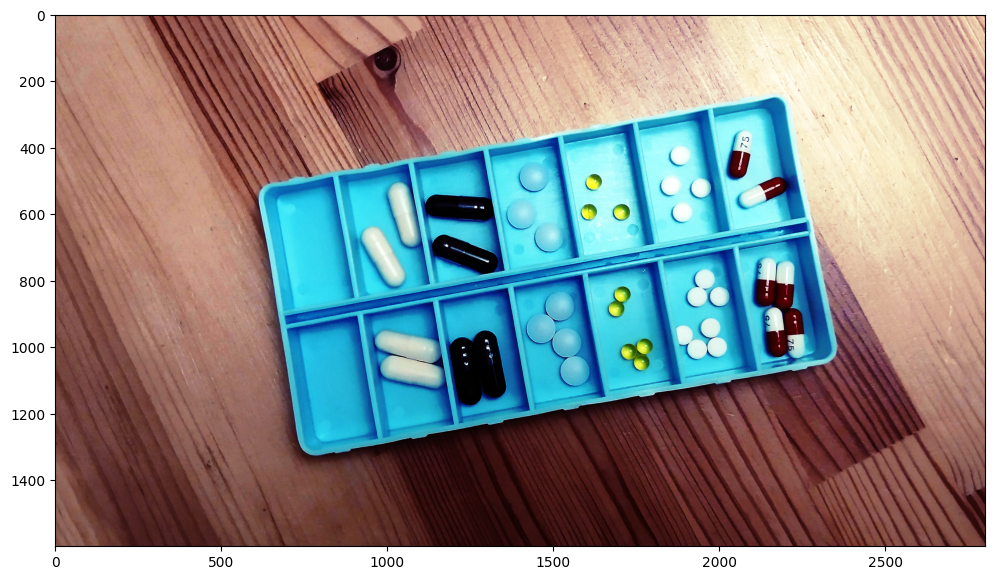

In [243]:
calib_rgb = cv2.cvtColor(calib, cv2.COLOR_BGR2RGB)

calib_rgb_r = cv2.equalizeHist(calib_rgb[:, :, 0])
calib_rgb_g = cv2.equalizeHist(calib_rgb[:, :, 1])
calib_rgb_b = cv2.equalizeHist(calib_rgb[:, :, 2])

calib_eq_hist = cv2.merge([calib_rgb_r, calib_rgb_g, calib_rgb_b])

plt.subplots(1, 1, figsize=(12, 8))[1].imshow(calib_eq_hist)

In [244]:
thresholded_img = None


@interact(
    img=fixed(calib_eq_hist),
    r=IntRangeSlider(
        min=0, max=255, step=1, value=[154, 224], layout=Layout(width="500px")
    ),
    g=IntRangeSlider(
        min=0, max=255, step=1, value=[161, 255], layout=Layout(width="500px")
    ),
    b=IntRangeSlider(
        min=0, max=255, step=1, value=[180, 219], layout=Layout(width="500px")
    ),
)
def get_in_range(img, r, g, b):
    global thresholded_img
    min_r, max_r = r
    min_g, max_g = g
    min_b, max_b = b

    thresholded = cv2.inRange(img, (min_r, min_g, min_b), (max_r, max_g, max_b))

    plt.subplots(1, 1, figsize=(12, 8))[1].imshow(thresholded, cmap="gray")
    thresholded_img = thresholded

interactive(children=(IntRangeSlider(value=(154, 224), description='r', layout=Layout(width='500px'), max=255)…

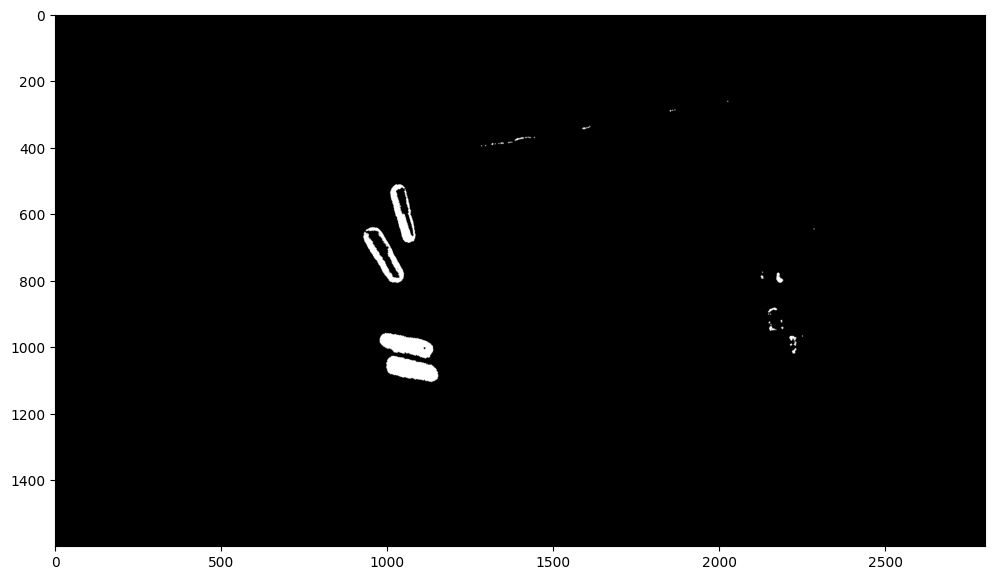

In [245]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

img = cv2.morphologyEx(thresholded_img, cv2.MORPH_OPEN, kernel)
plt.subplots(1, 1, figsize=(12, 8))[1].imshow(img, cmap="gray")

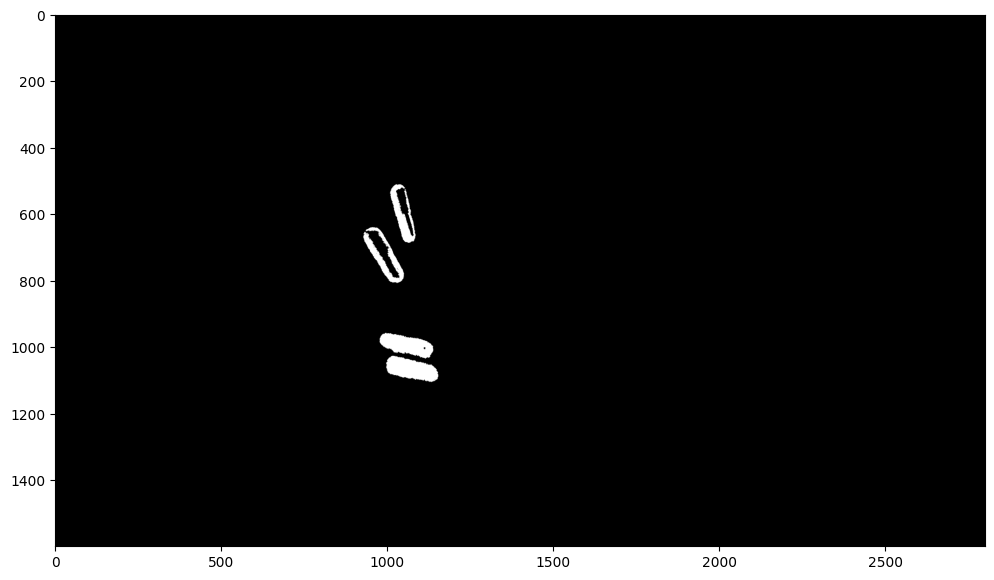

In [246]:
img_no_small_objects = remove_small_objects(img > 0, min_size=400)
plt.subplots(1, 1, figsize=(12, 8))[1].imshow(img_no_small_objects, cmap="gray")

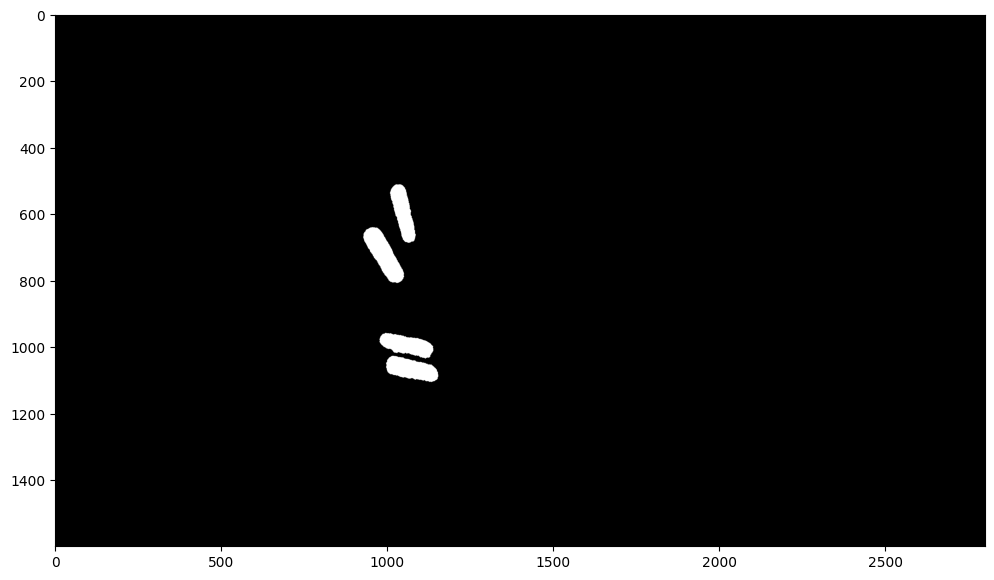

In [247]:
closed = cv2.morphologyEx(
    img_no_small_objects.astype(np.uint8),
    cv2.MORPH_CLOSE,
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)),
)
img_no_small_holes = remove_small_holes(closed > 0, area_threshold=5000)
plt.subplots(1, 1, figsize=(12, 8))[1].imshow(img_no_small_holes, cmap="gray")